In [14]:
# Import libraries and data
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('/Users/jennifermadson/Desktop/Projects/ctr_ab_testing/data/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [16]:
# Checking to see if users in the control group saw the new site or users in treatment saw old page
df.groupby(['group','landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [17]:
# Removing control/newpage and treatment/oldpage
df_group = df.loc[(df['group'] == 'control') & (df['landing_page'] == 'old_page') | (df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]

df_group.groupby(['group','landing_page']).count()

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


In [22]:
# Find users w/ duplicate values

df_group['user_id'].duplicated().sum()

1

In [23]:
# Find user_id for duplicate value

df_group[df_group.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

In [24]:
df[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [25]:
df_group = df_group.drop_duplicates(subset='user_id', keep="first")


<AxesSubplot:xlabel='group,landing_page,converted'>

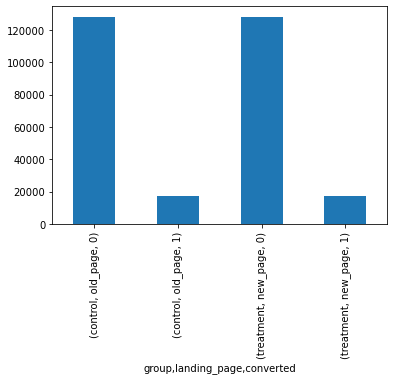

In [26]:
# Plot data for inspection

groups = df_group.groupby(['group','landing_page','converted']).size()
groups.plot.bar()

<AxesSubplot:ylabel='landing_page'>

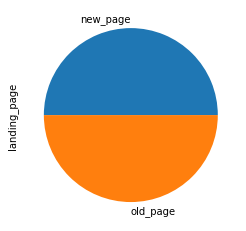

In [27]:
# pie plot

df_group['landing_page'].value_counts().plot.pie()

In [28]:
### Re-arrrange data into 2x2 for Chi-Squared
# 1) Split groups into two separate DataFrames
a = df_group[df_group['group'] == 'control']
b = df_group[df_group['group'] == 'treatment']

# 2) A-click, A-noclick, B-click, B-noclick
a_click = a.converted.sum()
a_noclick = a.converted.size - a.converted.sum()
b_click = b.converted.sum()
b_noclick = b.converted.size - b.converted.sum()

# 3) Create np array
T = np.array([[a_click, a_noclick], [b_click, b_noclick]])

In [29]:
print(scipy.stats.chi2_contingency(T,correction=False)[1])


0.18988337448194853
